# Import and process all corresponding data from the key paper. 

#### * Key Paper: https://www.sciencedirect.com/science/article/abs/pii/S1544612315001038

    * Title: Bitcoin, gold and the dollar – A GARCH volatility analysis

    * Author: Anne Haubo Dyhrberg

    * Publication: Finance Research Letters

    * Publisher: Elsevier

    * Date: February 2016

Will be importing 

0. BTC.pkl - downloaded daily BTC/USD data (data source: Yahoo Finance)

1. FEDFUND.csv - monthly effective fed rate. (data source: FRED)

2. GOLDPMGBD228NLBM.csv - daily Gold Fixing Price 3:00 PM (London Time) in London Bullion Market, based in USD. (data source: FRED)

3. KOSPI_index_20060512-20190612.xls - daily KOSPI index. (data source: KRX)

4. BOK_8.8.1.1원달러환율.csv - daily KRW/USD Exchange Rate (data source: BOK)


and reindex them to daily dataframe from 2014.01.01 ~ 2019.05.31

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

0. BTC

In [7]:
btc = pd.read_csv('./keypaperdata/BTC-USD.csv')
btc.head() # 2012.07.15 ~ 2019.06.12

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-07-15,7.62,8.65,7.62,8.50,8.50,835550
1,2012-07-16,8.50,9.49,7.32,8.80,8.80,1757815
2,2012-07-17,8.80,9.40,8.50,9.11,9.11,955210
3,2012-07-18,9.11,9.23,8.82,8.87,8.87,438703
4,2012-07-19,8.87,8.87,7.60,8.52,8.52,1267523


In [8]:
btc = btc[['Date', 'Close', 'Volume']]
btc.columns = ['date', 'close', 'vol_usd']
btc['vol_btc'] = btc.vol_usd/btc.close
btc.date = pd.to_datetime(btc.date)
btc.set_index('date', inplace=True)

btc = btc[(btc.index >= pd.to_datetime('2014-01-01')) & (btc.index <= pd.to_datetime('2019-05-31'))]
btc.head()

,close,vol_usd,vol_btc
date,,,
2014-01-01,815.940002,8663855,10618.250090
2014-01-02,856.909973,10826907,12634.824359
2014-01-03,884.260010,8409629,9510.357706
2014-01-04,924.690002,12784626,13825.850796
2014-01-05,1014.739990,20789364,20487.380220


In [9]:
btc.dtypes

close      float64
vol_usd      int64
vol_btc    float64
dtype: object

In [10]:
btc.to_csv('btc.csv')

1. Fed fund rate data

In [11]:
fed = pd.read_csv("./keypaperdata/FEDFUNDS.csv")
fed.head() # 1954.07.01 ~ 2019.05.01

,DATE,FEDFUNDS
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.06
3,1954-10-01,0.85
4,1954-11-01,0.83


In [12]:
fed.columns = ['date', 'fed_rate']
fed.date = pd.to_datetime(fed.date)
fed.set_index('date', inplace=True)

fed = fed.reindex(index=btc.index, method='ffill')
fed = fed[(fed.index >= pd.to_datetime('2014-01-01')) & (fed.index <= pd.to_datetime('2019-05-31'))]

fed.head()

,fed_rate
date,
2014-01-01,0.07
2014-01-02,0.07
2014-01-03,0.07
2014-01-04,0.07
2014-01-05,0.07


In [13]:
fed.dtypes

fed_rate    float64
dtype: object

In [14]:
fed.to_csv('fed.csv')

2. Gold

In [15]:
gold = pd.read_csv('./keypaperdata/GOLDPMGBD228NLBM.csv')
gold.head() # 2009.06.11 ~ 2019.06.11

,DATE,GOLDPMGBD228NLBM
0,2009-06-11,947.500
1,2009-06-12,937.250
2,2009-06-15,932.250
3,2009-06-16,934.000
4,2009-06-17,930.500


In [16]:
gold.columns = ['date', 'gold_usd']
gold.date = pd.to_datetime(gold.date)
gold.set_index('date', inplace=True)

gold.gold_usd.replace(to_replace='.', method='pad', inplace=True)
gold.gold_usd = pd.to_numeric(gold.gold_usd)

gold = gold.reindex(index=btc.index, method='ffill')
gold = gold[(gold.index >= pd.to_datetime('2014-01-01')) & (gold.index <= pd.to_datetime('2019-05-31'))]

gold.head()

,gold_usd
date,
2014-01-01,1204.5
2014-01-02,1225.0
2014-01-03,1234.5
2014-01-04,1234.5
2014-01-05,1234.5


In [17]:
gold.dtypes

gold_usd    float64
dtype: object

In [18]:
gold.to_csv('gold.csv')

3. KOSPI

In [19]:
kospi = pd.read_excel(pd.ExcelFile("./keypaperdata/KOSPI_index_20060512-20190612.xls"), 'Sheet1', thousands=',')
kospi.head()  # 2006.05.12 ~ 2019.06.12

,일자,현재지수,대비,등락률(%),배당수익률(%),주가이익비율,주가자산비율,시가지수,고가지수,저가지수,거래량(천주),거래대금(백만원),상장시가총액(백만원)
0,2006/05/12,1445.20,-19.50,-1.33,1.58,11.91,1.49,1448.57,1454.14,1429.92,260776,3755880,705654732
1,2006/05/15,1413.98,-31.22,-2.16,1.61,11.65,1.46,1424.58,1424.58,1406.88,250685,3936334,690651191
2,2006/05/16,1382.11,-31.87,-2.25,1.65,11.39,1.42,1415.81,1416.45,1373.52,285855,4439085,675119442
3,2006/05/17,1401.47,19.36,1.40,1.63,11.55,1.44,1386.93,1403.68,1386.93,270248,3829181,684397074
4,2006/05/18,1365.15,-36.32,-2.59,1.67,11.24,1.40,1360.76,1366.78,1356.04,355783,3911213,666633613


In [20]:
kospi = kospi[['일자', '현재지수']]
kospi.columns = ['date', 'kospi']
kospi.date = pd.to_datetime(kospi.date)
kospi.set_index('date', inplace=True)

kospi = kospi.reindex(index=btc.index, method='ffill')
kospi = kospi[(kospi.index >= pd.to_datetime('2014-01-01')) & (kospi.index <= pd.to_datetime('2019-05-31'))]

kospi.head()

,kospi
date,
2014-01-01,2011.34
2014-01-02,1967.19
2014-01-03,1946.14
2014-01-04,1946.14
2014-01-05,1946.14


In [21]:
kospi.dtypes

kospi    float64
dtype: object

In [22]:
kospi.to_csv('kospi.csv')

4. KRW/USD exchange rate

In [23]:
# OSError raised if engine='python' is not used. 
krwusd = pd.read_csv('./keypaperdata/BOK_8.8.1.1원달러환율.csv', skiprows=3, engine='python', thousands=',')
krwusd.head() # 2011.05.01 ~ 2019.06.12

,변환,원자료
0,2011/05/01,NaN
1,2011/05/02,1073.3
2,2011/05/03,1066.8
3,2011/05/04,1070.2
4,2011/05/05,NaN


In [24]:
krwusd.columns = ['date', 'ex_rate']
krwusd.date = pd.to_datetime(krwusd.date)
krwusd.set_index('date', inplace=True)

* pd.Dataframe.fillna(method=)

    - pad / ffill: propagate last valid observation forward to next valid
    - backfill / bfill: use NEXT valid observation to fill gap

In [25]:
# pd.DataFrame.fillna?
krwusd.ex_rate.fillna(method='ffill', inplace=True)

krwusd = krwusd.reindex(index=btc.index, method='ffill')
krwusd = krwusd[(krwusd.index >= pd.to_datetime('2014-01-01')) & (krwusd.index <= pd.to_datetime('2019-05-31'))]

krwusd.head()

,ex_rate
date,
2014-01-01,1055.3
2014-01-02,1055.3
2014-01-03,1050.4
2014-01-04,1050.4
2014-01-05,1050.4


In [26]:
krwusd.dtypes

ex_rate    float64
dtype: object

In [27]:
krwusd.to_csv('krwusd.csv')

### Merge all data into one dataframe

In [28]:
df = btc.join([fed, gold, kospi, krwusd])
df.head()

,close,vol_usd,vol_btc,fed_rate,gold_usd,kospi,ex_rate
date,,,,,,,
2014-01-01,815.940002,8663855,10618.250090,0.07,1204.5,2011.34,1055.3
2014-01-02,856.909973,10826907,12634.824359,0.07,1225.0,1967.19,1055.3
2014-01-03,884.260010,8409629,9510.357706,0.07,1234.5,1946.14,1050.4
2014-01-04,924.690002,12784626,13825.850796,0.07,1234.5,1946.14,1050.4
2014-01-05,1014.739990,20789364,20487.380220,0.07,1234.5,1946.14,1050.4


In [29]:
df.to_csv('all.csv')

In [30]:
df.to_pickle('./keypaperdata/all.pkl')

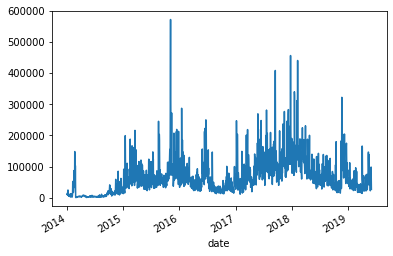

In [34]:
df.vol_btc.plot()
plt.show()